# Covid19 Data Analysis Notebook
------------------------------------------

### Let's Import the modules 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


###  importing covid19 dataset
importing "Covid19_Confirmed_dataset.csv" from "./Dataset" folder. 


In [2]:
corona_dataset_csv = pd.read_csv("C://Users/NayakD/Downloads/Project (1)/Datasets/covid19_Confirmed_dataset.csv")
corona_dataset_csv.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773


#### Let's check the shape of the dataframe

In [3]:
corona_dataset_csv.shape
corona_dataset_csv.describe()
corona_dataset_csv.corr()
corona_dataset_csv.isnull().sum()


Province/State    184
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
4/26/20             0
4/27/20             0
4/28/20             0
4/29/20             0
4/30/20             0
Length: 104, dtype: int64

### Delete the useless columns

In [4]:
df=corona_dataset_csv.drop(['Lat','Long'],axis=1)

In [5]:
df

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Western Sahara,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
262,NaN,Sao Tome and Principe,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,8,8,14
263,NaN,Yemen,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,6,6
264,NaN,Comoros,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


###  Aggregating the rows by the country

In [6]:
corona_dataset_aggregated=df.groupby("Country/Region").sum()

In [7]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [8]:
corona_dataset_aggregated.shape

(187, 100)

### Visualizing data related to a country for example China
visualization always helps for better understanding of our data.

(-4.95, 103.95, -10671.75, 224106.75)

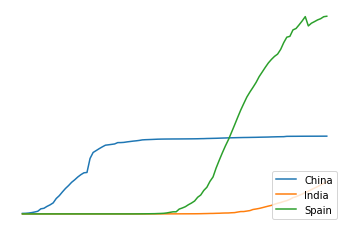

In [9]:
corona_dataset_aggregated.loc['China'].plot()
corona_dataset_aggregated.loc['India'].plot()
corona_dataset_aggregated.loc['Spain'].plot()
plt.legend(loc='lower right')
plt.axis('off')

### Calculating a good measure 
we need to find a good measure reperestend as a number, describing the spread of the virus in a country. 

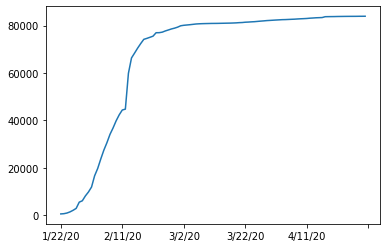

In [10]:
corona_dataset_aggregated.loc['China'].plot()

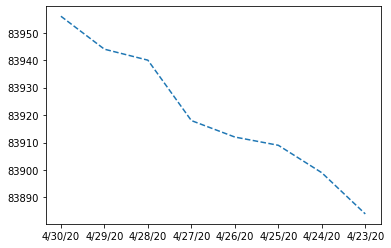

In [11]:
corona_dataset_aggregated.loc['China'].nlargest(8).plot(kind='line',style='--')

### task 3.1: caculating the first derivative of the curve

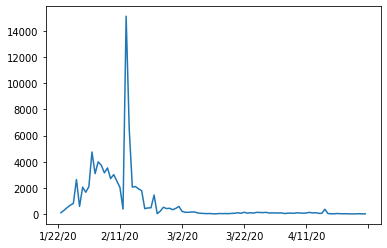

In [12]:
#corona_dataset_aggregated.loc['China'][2:].pct_change().plot()
corona_dataset_aggregated.loc['China'].diff().plot()

### task 3.2: find maxmimum infection rate for China

In [13]:
corona_dataset_aggregated.loc['China'].diff().max()

15136.0

In [14]:
corona_dataset_aggregated.loc['China'].pct_change().max()

0.9148418491484185

In [15]:
corona_dataset_aggregated.loc['India'].diff().max()

1893.0

### Task 3.3: find maximum infection rate for all of the countries. 

In [16]:
country=corona_dataset_aggregated.index.tolist()
max_infected_rate=[]
for c in country:
    max_infected_rate.append(corona_dataset_aggregated.loc[c].diff().max())
corona_dataset_aggregated['max_infection_rate']=max_infected_rate

In [17]:
corona_dataset_aggregated


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,474,480,484,342,342,342,343,344,344,66.0
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,4.0
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,6,6,5.0


### Task 3.4: create a new dataframe with only needed column 

In [18]:
corona_data = pd.DataFrame(corona_dataset_aggregated.max_infection_rate)

In [19]:
corona_data.nlargest(5,columns='max_infection_rate')

,max_infection_rate
Country/Region,
US,36188.0
France,26849.0
China,15136.0
Ecuador,11536.0
Spain,9630.0


### Task4: 
- Importing the WorldHappinessReport.csv dataset
- selecting needed columns for our analysis 
- join the datasets 
- calculate the correlations as the result of our analysis

### Task 4.1 : importing the dataset

In [20]:
happiness_report_csv = pd.read_csv("Datasets/worldwide_happiness_report.csv")

In [21]:
happiness_report_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### let's drop the useless columns 

In [22]:
useless = ['Overall rank','Score','Generosity','Perceptions of corruption']

In [23]:
happiness_report_csv=happiness_report_csv.drop(useless,axis=1)
happiness_report_csv.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


### changing the indices of the dataframe

In [24]:
happiness_report_csv=happiness_report_csv.rename(columns={"Country or region":"Country/Region"})
happiness_report_csv.set_index('Country/Region',inplace=True)

### now let's join two dataset we have prepared  

#### Corona Dataset :

In [25]:
corona_data.rename(columns={'Country/Region':"Country"},inplace=True)

In [26]:
corona_data

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0
...,...
West Bank and Gaza,66.0
Western Sahara,4.0
Yemen,5.0


#### wolrd happiness report Dataset :

In [27]:
happiness_report_csv

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country/Region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557
...,...,...,...,...
Rwanda,0.359,0.711,0.614,0.555
Tanzania,0.476,0.885,0.499,0.417
Afghanistan,0.350,0.517,0.361,0.000


In [28]:
happiness_report_csv.merge(corona_data,on='Country/Region').shape==corona_data.join(happiness_report_csv,how='inner').shape
df = corona_data.join(happiness_report_csv,how='inner')

### correlation matrix 

In [29]:
df.corr()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


### Visualization of the results
our Analysis is not finished unless we visualize the results in terms figures and graphs so that everyone can understand what you get out of our analysis

In [30]:
df.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country/Region,,,,,
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


### Plotting GDP vs maximum Infection rate

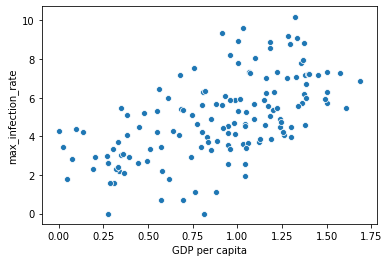

In [31]:
sns.scatterplot(df['GDP per capita'],np.log(df['max_infection_rate']))


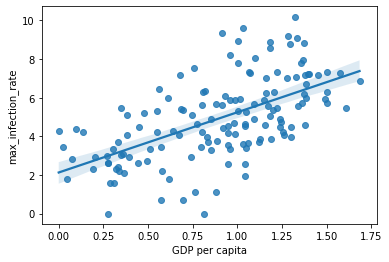

In [32]:
sns.regplot(df['GDP per capita'],np.log(df['max_infection_rate']))

In [165]:
india_dataset=corona_dataset_csv.drop(['Lat','Long'],axis=1).loc[corona_dataset_csv['Country/Region']=='India'].set_index("Country/Region").dropna(axis=1).T

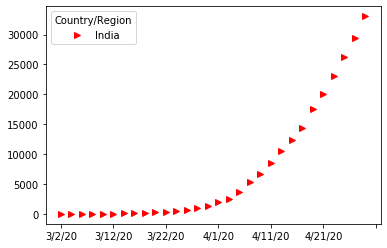

In [166]:
india_dataset[40::2].plot(kind='line',style='>',color='r')
india_dataset=india_dataset.reset_index()
india_dataset = india_dataset.rename(columns={"India":"cases",'index':"India"})
india_dataset.set_index("India",inplace=True)

## Forecast using Arima And Sarimax

#### Testing Dataset_Using Adfuller from statsmodels.tsa.stattools import adfuller

In [126]:
from statsmodels.tsa.stattools import adfuller
def test(case):
    if adfuller(case)[1]<0.5:
        return 'Stationary'
    else:
        return 'Not Stationary'


In [169]:
india_cases = india_dataset.copy()
india_cases.index = pd.to_datetime(india_cases.index)

In [176]:
india_cases['diff_1D'] = india_cases['cases']-india_cases['cases'].shift(1)
test(india_cases['diff_1D'].dropna())

'Not Stationary'

In [207]:
india_cases['diff_14D'] = india_cases['cases']-india_cases['cases'].shift(14)
test(india_cases['diff_14D'].dropna())

'Not Stationary'

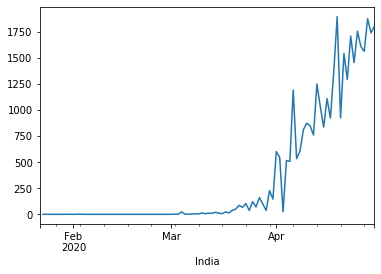

In [216]:
india_cases.diff_1D.plot()


#### Autocorrelation_plot using pandas

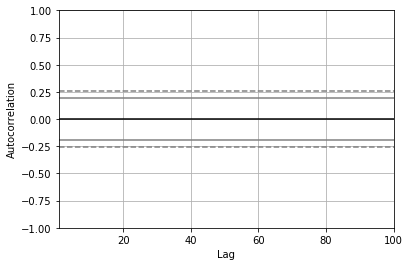

In [208]:
from pandas.plotting import  autocorrelation_plot
autocorrelation_plot(india_cases.diff_14D)

#### Plot of ACF and PACF

In [130]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

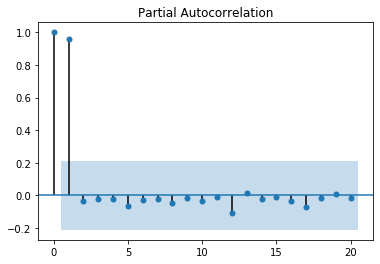

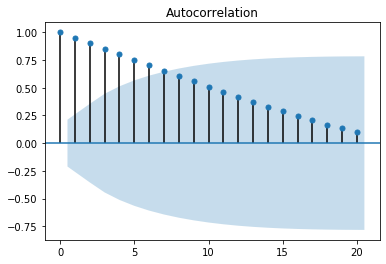

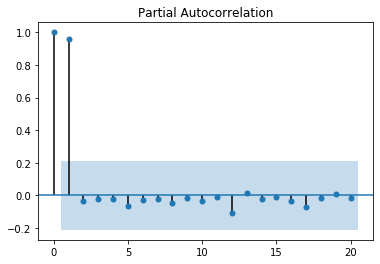

In [209]:
plot_acf(india_cases['diff_14D'].dropna())
plot_pacf(india_cases['diff_14D'].dropna())


In [252]:

from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(india_cases['diff_14D'].dropna(),order=(1,1,0))
model_fit= model.fit()

E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [253]:
model_fit.summary()
#india_cases.shape

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.diff_14D   No. Observations:                   85
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -599.887
Method:                       css-mle   S.D. of innovations            280.157
Date:                Sat, 13 Jun 2020   AIC                           1205.774
Time:                        23:40:25   BIC                           1213.102
Sample:                    02-06-2020   HQIC                          1208.721
                         - 04-30-2020                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              256.0337     84.531      3.029      0.002      90.356     421.712
ar.L1.D.diff_14D     0.6480      0.082      7.871      0.000       0.487       0.809
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5432           +0.0000j            1.5432            0.0000
-----------------------------------------------------------------------------
"""

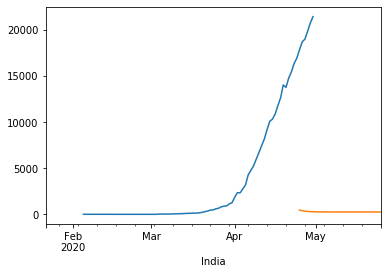

In [255]:
forecast = model_fit.predict(start=80,end=110,dynamic=True)
india_cases.diff_14D.plot()
forecast.plot()

#### The model of arima is not valid. Try Sarimax

## Sarimax

In [236]:

import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(india_cases.diff_14D,order=(1,1,2),seasonal_order=(1,1,0,14)) # seasonal order found in pacf 14 is shift for seasonal
result = model.fit()

E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
E:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
E:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


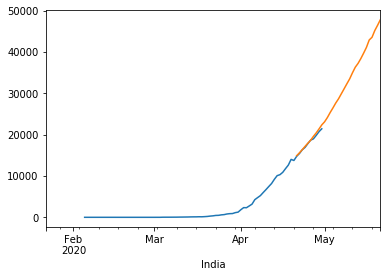

In [257]:
df1=result.predict(90,120,dynamic=True)
india_cases.diff_14D.plot()
df1.plot()

### Using RNN

In [263]:
import keras

Using TensorFlow backend.
E:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1) or '1type' as

In [267]:
df = india_cases.loc[:,['diff_1D']]
df = df.fillna(0)

Country/Region,diff_1D
India,
2020-01-22,0.0
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0
...,...
2020-04-26,1607.0
2020-04-27,1561.0
2020-04-28,1873.0


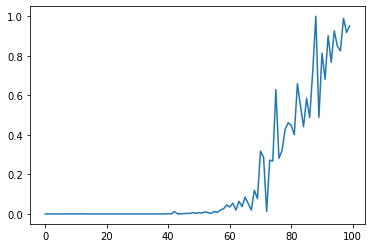

In [298]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range=(0,1))
values=minmax.fit_transform(df)
plt.plot(values)

In [299]:
test_size=int(len(df)*0.35)
train_size = len(df)-test_size
train,test=values[0:train_size],values[train_size:len(values)]

In [322]:
def create_dataset(data,time_stamp=1):
    datax,datay=[],[]
    for i in range(len(data)-time_stamp-1):
        a = data[i:(i+time_stamp),0]
        datax.append(a)
        datay.append(data[i+time_stamp,0])
    return np.array(datax),np.array(datay)

In [445]:
x_train,y_train=create_dataset(train,5)
x_test,y_test=create_dataset(test,5)

In [446]:
x_train.shape,y_train.shape

((59, 5), (59,))

In [469]:
x_train3d = np.atleast_3d(x_train)
x_test3d = np.atleast_3d(x_test)
x_train3d.shape

(59, 5, 1)

In [437]:
from keras.models import Sequential
from keras.layers import Dense,Activation,LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from livelossplot.tf_keras import PlotLossesCallback

In [506]:
model = Sequential()
model.add(LSTM(10,input_shape=(5,1),return_sequences=True))#input_shape = (x_train.shape[1],x_test.shape[1])
model.add(LSTM(10,return_sequences=True))

model.add(LSTM(10))

model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_91 (LSTM)               (None, 5, 10)             480       
_________________________________________________________________
lstm_92 (LSTM)               (None, 5, 10)             840       
_________________________________________________________________
lstm_93 (LSTM)               (None, 10)                840       
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 11        
Total params: 2,171
Trainable params: 2,171
Non-trainable params: 0
_________________________________________________________________


In [507]:
model.fit(x_train3d,y_train,validation_data=(x_test3d,y_test),epochs=100,verbose=1)

Train on 59 samples, validate on 29 samples
Epoch 1/100
59/59 [==============================] - 8s 135ms/step - loss: 1.9150e-04 - accuracy: 0.5593 - val_loss: 0.3848 - val_accuracy: 0.0000e+00
Epoch 2/100
59/59 [==============================] - 0s 1ms/step - loss: 1.8296e-04 - accuracy: 0.5593 - val_loss: 0.3814 - val_accuracy: 0.0000e+00
Epoch 3/100
59/59 [==============================] - 0s 2ms/step - loss: 1.8703e-04 - accuracy: 0.5593 - val_loss: 0.3830 - val_accuracy: 0.0000e+00
Epoch 4/100
59/59 [==============================] - 0s 1ms/step - loss: 1.7707e-04 - accuracy: 0.5593 - val_loss: 0.3847 - val_accuracy: 0.0000e+00
Epoch 5/100
59/59 [==============================] - 0s 1ms/step - loss: 1.7695e-04 - accuracy: 0.5593 - val_loss: 0.3843 - val_accuracy: 0.0000e+00
Epoch 6/100
59/59 [==============================] - 0s 881us/step - loss: 1.7837e-04 - accuracy: 0.5593 - val_loss: 0.3821 - val_accuracy: 0.0000e+00
Epoch 7/100
59/59 [==============================] - 0s 86

Epoch 55/100
59/59 [==============================] - 0s 746us/step - loss: 1.2462e-04 - accuracy: 0.5593 - val_loss: 0.1507 - val_accuracy: 0.0000e+00
Epoch 56/100
59/59 [==============================] - 0s 746us/step - loss: 1.1205e-04 - accuracy: 0.5593 - val_loss: 0.1436 - val_accuracy: 0.0000e+00
Epoch 57/100
59/59 [==============================] - 0s 797us/step - loss: 1.1310e-04 - accuracy: 0.5593 - val_loss: 0.1314 - val_accuracy: 0.0000e+00
Epoch 58/100
59/59 [==============================] - 0s 814us/step - loss: 9.7618e-05 - accuracy: 0.5593 - val_loss: 0.1175 - val_accuracy: 0.0000e+00
Epoch 59/100
59/59 [==============================] - 0s 847us/step - loss: 1.0169e-04 - accuracy: 0.5593 - val_loss: 0.1065 - val_accuracy: 0.0000e+00
Epoch 60/100
59/59 [==============================] - 0s 779us/step - loss: 9.1624e-05 - accuracy: 0.5593 - val_loss: 0.0974 - val_accuracy: 0.0000e+00
Epoch 61/100
59/59 [==============================] - 0s 779us/step - loss: 9.2351e-05 -

In [510]:
_,acctest = model.evaluate(x_test3d,y_test)
print(acctest*100)
_,acctrain = model.evaluate(x_train3d,y_train)
print(acctrain*100)

29/29 [==============================] - 0s 276us/step
3.448275849223137
59/59 [==============================] - 0s 288us/step
55.93220591545105


### Using Regression

No handles with labels found to put in legend.


array([ 0.17343681,  0.11598902,  0.44963222,  0.1318397 , -0.00763811,
        0.50728254,  0.33875952,  0.714836  ,  0.05955654,  0.51683077,
        0.53651705,  0.48285445,  0.46171815,  0.5202122 ,  0.81803834,
        0.43867431,  0.52835165,  0.72259442,  0.53871059,  1.02303525,
        0.97151216,  0.34094285,  1.16600994,  0.69222665,  1.07986003,
        0.78513938,  1.1083938 ,  0.85954691,  0.98752269])

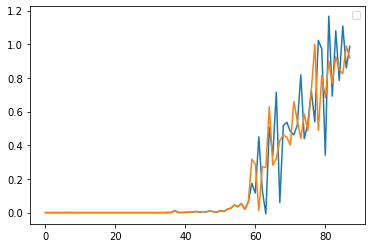

In [564]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve
model = LinearRegression().fit(x_train,y_train)
y_pred=model.predict(x_test)
p=y_train.tolist()
p.extend(y_pred)
plt.plot(p)
q=y_train.tolist()
q.extend(y_test)
plt.plot(q)
plt.legend()
y_pred

In [713]:
x_input = x_test[10:]
temp_input=[]
for i in range(len(x_input)):
    temp_input.extend(x_input[i].tolist())
len(temp_input)
#len(x_test[10:])

95

In [714]:

i=0
days =30
lst_output=[]
while(i<days):
    x_input = temp_input[70+i:70+i+5]
    yhat = model.predict([x_input])
    print(yhat)
    temp_input.append(yhat[0])
    lst_output.append(yhat[0])
    i+=1
 

[1.07986003]
[0.74739431]
[0.92079439]
[0.77443028]
[1.0950957]
[0.78513938]
[1.05195424]
[0.68942006]
[1.13018614]
[0.79124516]
[1.1083938]
[0.88554115]
[1.00307179]
[0.84371531]
[1.11752368]
[0.85954691]
[0.91274473]
[0.90226009]
[1.09335761]
[0.85534198]
[0.98752269]
[1.2139467]
[1.07086816]
[0.72161794]
[1.16505317]
[0.87084713]
[1.28923828]
[0.73633979]
[1.25441105]
[0.6962103]


In [715]:
lst_output

[1.0798600330210317,
 0.7473943084115655,
 0.9207943873090961,
 0.7744302846370612,
 1.095095696696158,
 0.7851393776327592,
 1.051954238473671,
 0.6894200565840938,
 1.1301861439715641,
 0.7912451634534148,
 1.1083937995261162,
 0.8855411547877268,
 1.0030717935338722,
 0.8437153133888096,
 1.117523677380587,
 0.8595469090033196,
 0.9127447262224198,
 0.9022600930856646,
 1.093357614634317,
 0.8553419810324909,
 0.9875226935474262,
 1.2139466950861393,
 1.0708681565712685,
 0.7216179388621624,
 1.1650531673297757,
 0.8708471288205549,
 1.289238279615286,
 0.7363397940693808,
 1.254411050551472,
 0.6962102952506994]

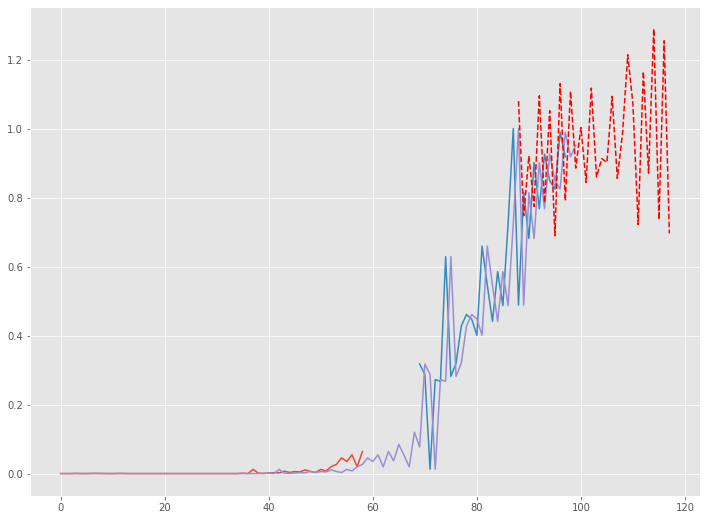

In [728]:
plt.style.use("ggplot")
fig = plt.figure(figsize=(12,9))
plt.plot(y_train.tolist())
plt.plot(range(len(y_train)+10,len(y_train)+len(y_test)+10),y_test.tolist())
plt.plot(values)
plt.plot(range(len(y_train)+len(y_test),len(y_train)+len(y_test)+30),lst_output,linestyle='--',color='r')